# NYPD Crime Reports Dataset

You are asked to analyze the dataset with all the valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of 2016. 

The dataset is available at:
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

It is a big dataset with ~5.5 million crimes reported to NYPD. 

## Attribute Description

Below you can find the description of the attributes, and their datatypes. 

| Column | Description | Data Type
|--------|-------------------|----|
| CMPLNT_NUM | Randomly generated persistent ID for each complaint  | bigint(20) |
| CMPLNT_FR | Exact datetime of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists) | datetime |
| CMPLNT_TO | Ending datetime of occurrence for the reported event, if exact time of occurrence is unknown | datetime
| RPT_DT | Date event was reported to police  | date
| KY_CD | Three digit offense classification code | char(3)
| OFNS_DESC | Description of offense corresponding with key code | varchar(80)
| PD_CD | Three digit internal classification code (more granular than Key Code) | char(3)
| PD_DESC | Description of internal classification corresponding with PD code (more granular than Offense Description) | varchar(60)
| CRM_ATPT_CPTD_CD | Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely | enum('COMPLETED','ATTEMPTED')
| LAW_CAT_CD | Level of offense: felony, misdemeanor, violation  | enum('FELONY','MISDEMEANOR','VIOLATION')
| JURIS_DESC | Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc. | varchar(80)
| BORO_NM | The name of the borough in which the incident occurred | varchar(20)
| ADDR_PCT_CD | The precinct in which the incident occurred | char(3)
| LOC_OF_OCCUR_DESC | Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of | enum('FRONT OF','INSIDE','OPPOSITE OF','OUTSIDE','REAR OF')
| PREM_TYP_DESC | Specific description of premises; grocery store, residence, street, etc. | varchar(80)
| PARKS_NM | Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included) | varchar(80)
| HADEVELOPT | Name of NYCHA housing development of occurrence, if applicable | varchar(80)
| X_COORD_CD | X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104) | char(9)
| Y_COORD_CD | Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104) | char(9)
| Latitude | Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)  | double
| Longitude | Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) | double

Additional Notes: https://www1.nyc.gov/assets/nypd/downloads/pdf/analysis_and_planning/incident_level_data_footnotes.pdf

In [1]:
!pip install geopandas sqlalchemy
!apt-get install python3-mysqldb

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 14.8MB 288kB/s 
     |████████████████████████████████| 10.9MB 44.9MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  default-mysql-server | virtual-mysql-server python-egenix-mxdatetime
  python3-mysqldb-dbg
The following NEW packages will be installed:
  python3-mysqldb
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 46.0 kB of archives.
After this operation, 183 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-mysqldb amd64 1.3.10-1build1 [46.0 kB]
Fetched 46.0 kB in 1s (38.5 kB/s)
Selecting previously unselected package python3-mysqldb.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../python3-mysqldb_1.3.10-1build1_amd64.deb ...
Unpacking python3-mysqldb (1.3.10-1build1) ...
Setting up

## MySQL Database

For your convenience, the dataset is stored in the `nypd_complaints` database on the MySQL Server `db.ipeirotis.org`. You can connect and see the dataset using your standard username and password (`student`, `dwdstudent2015`). 

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from sqlalchemy import create_engine
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
conn_string = 'mysql://{user}:{password}@{host}:{port}/{db}?charset={encoding}'.format(
    user='student', 
    password='dwdstudent2015', 
    host = 'db.ipeirotis.org', 
    port=3306, 
    db='nypd_complaints',
    encoding = 'utf8'
)
engine = create_engine(conn_string)

# Questions

You are asked to analyze the dataset and provide answers for the questions below. You can answer the questions using Python, SQL, or a combination of them. You are *strongly* encouraged though to push most of the aggregation calculation to happen with SQL. Fetching the whole dataset in memory and doing _all_ the aggregation calculations in Pandas may cause significant problems, as you may often run out of memory.

## Question 1: Composition of crimes

* **Question 1a**: How many total reported crimes are in the dataset?
* **Question 1b**: Analyze the column `LAW_CAT_CD` and provide the breakdown of the reported crimes among `FELONY`,`MISDEMEANOR`, and `VIOLATION`, i.e., report the number of felonies, misdemeanors, and violations.
* **Question 1c**: Across **felonies**, report the number of crimes, broken down by  offense description (as reported in the `OFNS_DESC` column)

In [4]:
# Question 1a: How many total reported crimes are in the dataset?
conn = engine.connect()
data = pd.read_sql_table('nypd', conn)
data.head()

,CMPLNT_NUM,CMPLNT_FR,CMPLNT_TO,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,100000228,2012-02-08 18:00:00,2012-02-08 19:00:00,2012-02-09,361,OFF. AGNST PUB ORD SENSBLTY &,639,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,60,INSIDE,RESIDENCE - APT. HOUSE,None,None,995500,149215,40.576238,-73.959504
1,100000480,2010-01-26 17:00:00,NaT,2010-01-27,361,OFF. AGNST PUB ORD SENSBLTY &,639,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,41,INSIDE,STREET,None,None,1017933,232218,40.804005,-73.878335
2,100000589,2009-11-20 13:00:00,2009-11-29 13:20:00,2009-12-02,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,52,FRONT OF,STREET,None,None,1012778,255259,40.867264,-73.896858
3,100000659,2015-08-04 20:00:00,2015-08-05 08:00:00,2015-08-05,341,PETIT LARCENY,321,"LARCENY,PETIT FROM AUTO",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105,REAR OF,OTHER,None,None,1054851,181458,40.664464,-73.745518
4,100000864,2007-11-06 21:00:00,2007-11-07 07:00:00,2007-11-07,351,CRIMINAL MISCHIEF & RELATED OF,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,112,INSIDE,RESIDENCE - APT. HOUSE,None,None,1023475,207175,40.735245,-73.858463


In [5]:
answ = len(data)
print("Q. How many total reported crimes are in the dataset?\nA. {}".format(answ))

Q. How many total reported crimes are in the dataset?
A. 5580035


In [6]:
# Question 1b: Analyze the column LAW_CAT_CD and report the number of felonies, misdemeanors, and violations.
data['LAW_CAT_CD'].value_counts()

MISDEMEANOR    3180644
FELONY         1717265
VIOLATION       682126
Name: LAW_CAT_CD, dtype: int64

In [7]:
# Question 1c: Across felonies, report the number of crimes, broken down by offense description (as reported in the OFNS_DESC column)
data[data['LAW_CAT_CD']=='FELONY']
data['OFNS_DESC'][data['LAW_CAT_CD']=='FELONY'].value_counts()

GRAND LARCENY                      473457
ROBBERY                            214271
FELONY ASSAULT                     204904
BURGLARY                           204396
MISCELLANEOUS PENAL LAW            123576
GRAND LARCENY OF MOTOR VEHICLE     108387
CRIMINAL MISCHIEF & RELATED OF      82378
DANGEROUS DRUGS                     67426
THEFT-FRAUD                         61557
DANGEROUS WEAPONS                   56027
FORGERY                             55585
RAPE                                15228
ARSON                               14760
SEX CRIMES                          12163
POSSESSION OF STOLEN PROPERTY        9881
MURDER & NON-NEGL. MANSLAUGHTER      4909
NYS LAWS-UNCLASSIFIED FELONY         4443
KIDNAPPING & RELATED OFFENSES        2437
CHILD ABANDONMENT/NON SUPPORT         388
PROSTITUTION & RELATED OFFENSES       137
GAMBLING                              125
HOMICIDE-NEGLIGENT-VEHICLE             94
INTOXICATED/IMPAIRED DRIVING           49
ENDAN WELFARE INCOMP              

## Question 2: Is crime increasing or decreasing in NYC?

Use the column `CMPLNT_FR` that reports the date/time of the crime. You are asked to analyze the crimes that happened between January 1st 2006 and December 31st 2016. 

* **Question 2a**: Create a plot that shows the *total* number of **all** reported crimes *per month*.
* **Question 2b**: Create a plot that shows the *total* number of **all** reported crimes *per year*.
* **Question 2c**: Create a plot that shows the *total* number of reported **felonies** *per month*.
* **Question 2d**: Create a plot that shows the *total* number of reported **felonies** *per year*.

**Hint 1**: Be aware that comparisons with dates in MySQL are tricky. You will want to use the format `2006-01-01` for a date, so that it gets properly interpreted by MySQL.

**Hint 2**: You can use the `MONTH()` and `YEAR()` commands in SQL, or the  `resample` command in Pandas, to compute statistics on a per-month and per-year basis. If you use resample, understand the difference between `resample(...).sum()` and `resample(...).mean()`. The `mean()` vs `sum()` can generate very different results, especially when the timestamp variable has a very fine granularity (as happens in our case with `CMPLNT_FR`).

In [8]:
df = data[(data['CMPLNT_FR'] >'2006-01-01' ) & (data['CMPLNT_FR'] <= '2016-12-31')]
df['YEAR'] = pd.DatetimeIndex(df['CMPLNT_FR']).year
df['MONTH'] = pd.DatetimeIndex(df['CMPLNT_FR']).month
df.copy()
#df.drop(['CMPLNT_FR	', 'CMPLNT_TO', 'RPT_DT', ], axis=1)
df = df[['CMPLNT_NUM','CMPLNT_FR','YEAR','MONTH','LAW_CAT_CD','OFNS_DESC','BORO_NM','Latitude','Longitude']]
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CMPLNT_NUM,CMPLNT_FR,YEAR,MONTH,LAW_CAT_CD,OFNS_DESC,BORO_NM,Latitude,Longitude
0,100000228,2012-02-08 18:00:00,2012,2,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,BROOKLYN,40.576238,-73.959504
1,100000480,2010-01-26 17:00:00,2010,1,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,BRONX,40.804005,-73.878335
2,100000589,2009-11-20 13:00:00,2009,11,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,BRONX,40.867264,-73.896858
3,100000659,2015-08-04 20:00:00,2015,8,MISDEMEANOR,PETIT LARCENY,QUEENS,40.664464,-73.745518
4,100000864,2007-11-06 21:00:00,2007,11,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,QUEENS,40.735245,-73.858463


In [9]:
# Question 2a: Create a plot that shows the total number of all reported crimes per month
df['MONTH'].value_counts()
df['MONTH'].value_counts().sort_index()
# to dictionary 
values = df['MONTH'].value_counts().sort_index().keys().tolist()
counts = df['MONTH'].value_counts().sort_index().tolist()
value_dict = dict(zip(values, counts))
print(value_dict)
new_label = ['JAN','FEB','MAR','APR','MAY','JUN',"JUL","AUG","SEP",'OCT','NOV','DEC']


{1: 451873, 2: 397239, 3: 460680, 4: 454889, 5: 489216, 6: 480976, 7: 496737, 8: 497366, 9: 476524, 10: 485098, 11: 440300, 12: 428687}


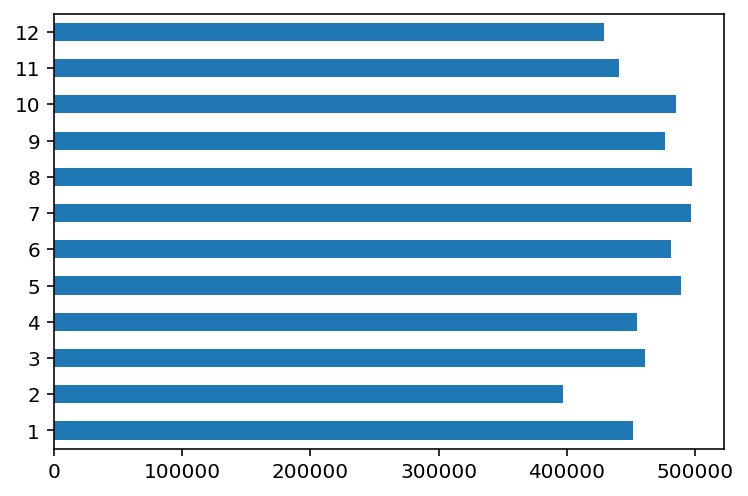

In [10]:
df['MONTH'].value_counts().sort_index(ascending='True').plot(kind='barh')


<BarContainer object of 12 artists>

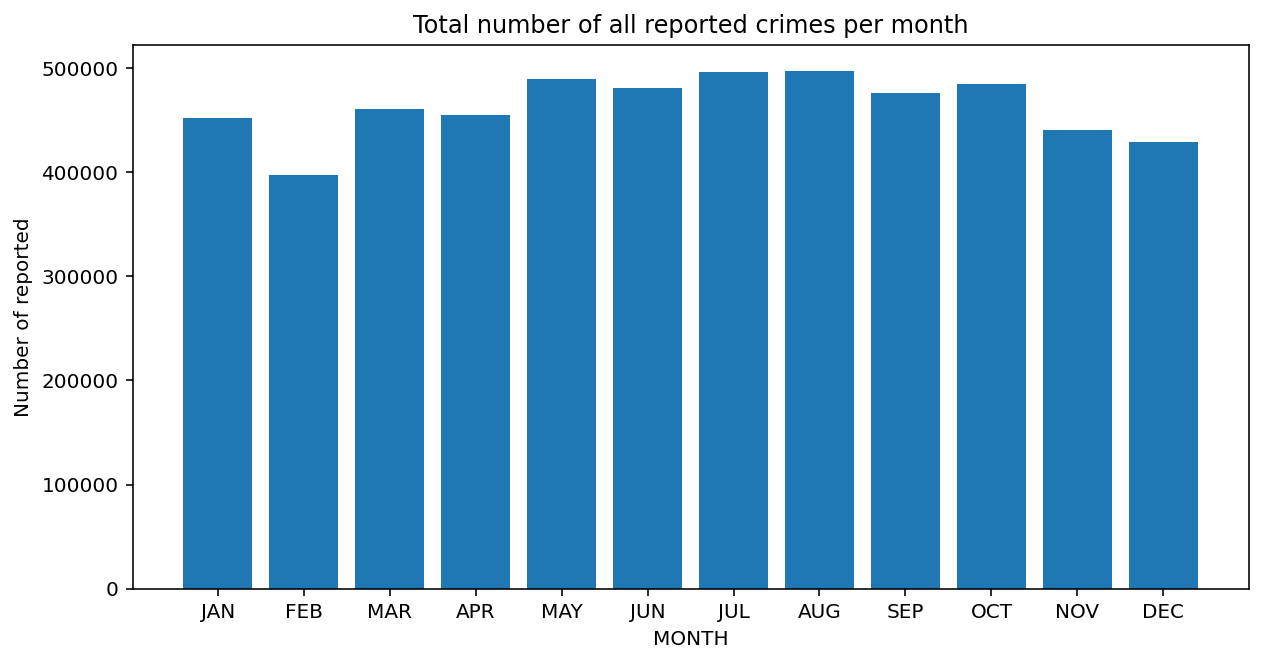

In [11]:
plt.figure(figsize=(10,5))
plt.title('Total number of all reported crimes per month')
plt.xlabel("MONTH")
plt.ylabel("Number of reported")
plt.bar(new_label,counts)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


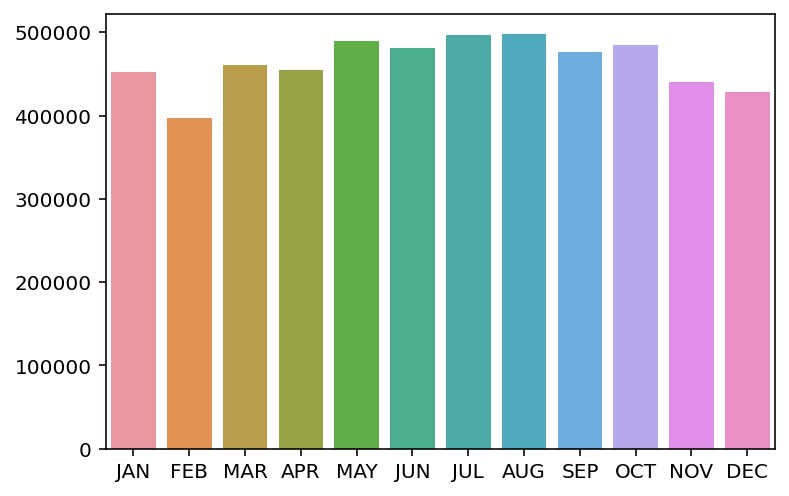

In [12]:
import seaborn as sns
sns.barplot(list(value_dict.keys()), list(value_dict.values()))
sns.barplot(new_label, list(value_dict.values()))

In [13]:
# # len(df['MONTH_YEAR'].value_counts())

# df['MONTH_YEAR'].value_counts()
# df['MONTH_YEAR'] = df['MONTH_YEAR'].astype(str)
# values = df['MONTH_YEAR'].value_counts().keys().tolist()
# counts = df['MONTH_YEAR'].value_counts().tolist()
# value_dict = dict(zip(values, counts))
# value_dict

{2006: 539022, 2007: 537235, 2008: 528726, 2009: 510996, 2010: 509852, 2011: 498380, 2012: 504334, 2013: 495302, 2014: 491131, 2015: 477040, 2016: 467567}


<BarContainer object of 11 artists>

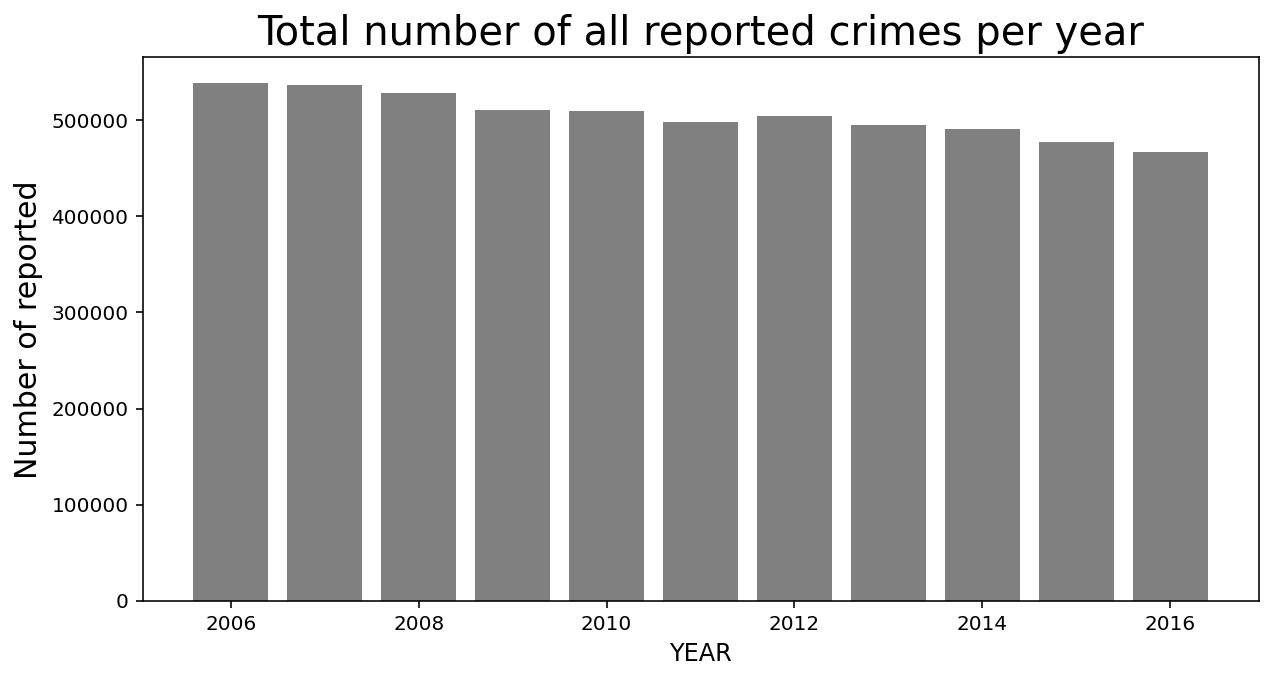

In [14]:
# Question 2b: Create a plot that shows the total number of all reported crimes per year.
df['YEAR'].value_counts()
df['YEAR'].value_counts().sort_index()
values = df['YEAR'].value_counts().sort_index().keys().tolist()
counts = df['YEAR'].value_counts().sort_index().tolist()
value_dict = dict(zip(values, counts))
print(value_dict)
plt.figure(figsize=(10,5))
plt.title('Total number of all reported crimes per year',fontsize=20)
plt.xlabel("YEAR",fontsize=12)
plt.ylabel("Number of reported",fontsize=15)
plt.bar(values,counts, color='grey')


In [15]:
# Question 2c: Create a plot that shows the total number of reported felonies per month.
#df.info()
df['LAW_CAT_CD'].value_counts()
df_fel = df[df['LAW_CAT_CD'] == 'FELONY']
print(df_fel.head(10))
df_fel = df_fel.reset_index(drop=True)
print(df_fel.head(10))

    CMPLNT_NUM           CMPLNT_FR  YEAR  ...    BORO_NM   Latitude  Longitude
8    100001206 2012-02-15 12:00:00  2012  ...     QUEENS  40.680750 -73.777865
9    100001253 2014-08-17 08:00:00  2014  ...  MANHATTAN  40.865458 -73.920939
22   100004581 2012-08-24 23:00:00  2012  ...  MANHATTAN  40.830621 -73.948624
26   100005072 2008-07-15 14:05:00  2008  ...     QUEENS  40.730665 -73.745510
28   100005768 2007-01-31 02:00:00  2007  ...  MANHATTAN  40.759140 -73.990266
29   100005920 2012-07-26 15:00:00  2012  ...     QUEENS  40.775695 -73.900578
32   100006172 2012-02-11 15:00:00  2012  ...      BRONX  40.824144 -73.917173
35   100006313 2013-07-04 01:00:00  2013  ...   BROOKLYN  40.683911 -73.960939
36   100006320 2015-07-05 05:15:00  2015  ...   BROOKLYN  40.670391 -73.906034
37   100006411 2015-10-16 18:27:00  2015  ...      BRONX  40.848603 -73.885411

[10 rows x 9 columns]
   CMPLNT_NUM           CMPLNT_FR  YEAR  ...    BORO_NM   Latitude  Longitude
0   100001206 2012-02-15 12:00

In [16]:
df_fel['LAW_CAT_CD'].value_counts()

FELONY    1706019
Name: LAW_CAT_CD, dtype: int64

{1: 139760, 2: 118586, 3: 135362, 4: 133945, 5: 145884, 6: 144636, 7: 152772, 8: 154332, 9: 148058, 10: 152603, 11: 140123, 12: 139958}


<BarContainer object of 12 artists>

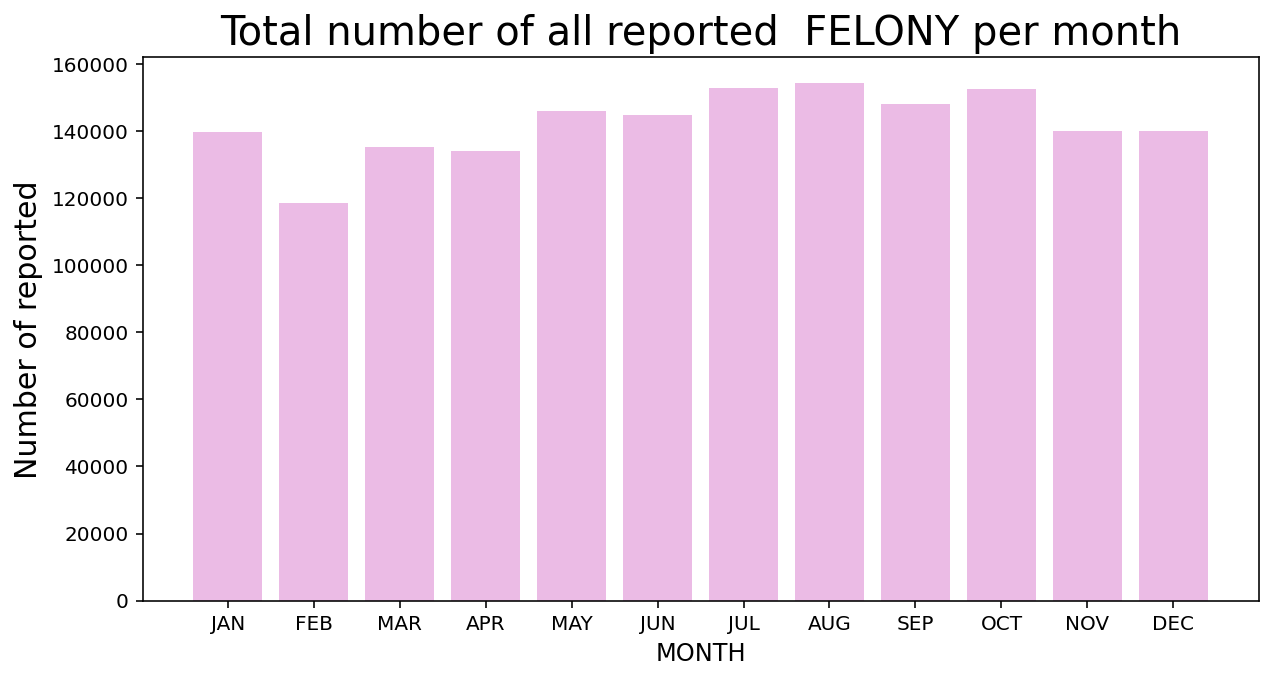

In [17]:
df_fel['MONTH'].value_counts()
df_fel['MONTH'].value_counts().sort_index()
values = df_fel['MONTH'].value_counts().sort_index().keys().tolist()
counts = df_fel['MONTH'].value_counts().sort_index().tolist()
value_dict = dict(zip(values, counts))
print(value_dict)
plt.figure(figsize=(10,5))
plt.title('Total number of all reported  FELONY per month',fontsize=20)
plt.xlabel("MONTH",fontsize=12)
plt.ylabel("Number of reported",fontsize=15)
new_label = ['JAN','FEB','MAR','APR','MAY','JUN',"JUL","AUG","SEP",'OCT','NOV','DEC']
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],new_label)
plt.bar(values,counts, color='#ebbbe5')

{2006: 174970, 2007: 167996, 2008: 164069, 2009: 149762, 2010: 147587, 2011: 148203, 2012: 153813, 2013: 153933, 2014: 151156, 2015: 150019, 2016: 144511}


<BarContainer object of 11 artists>

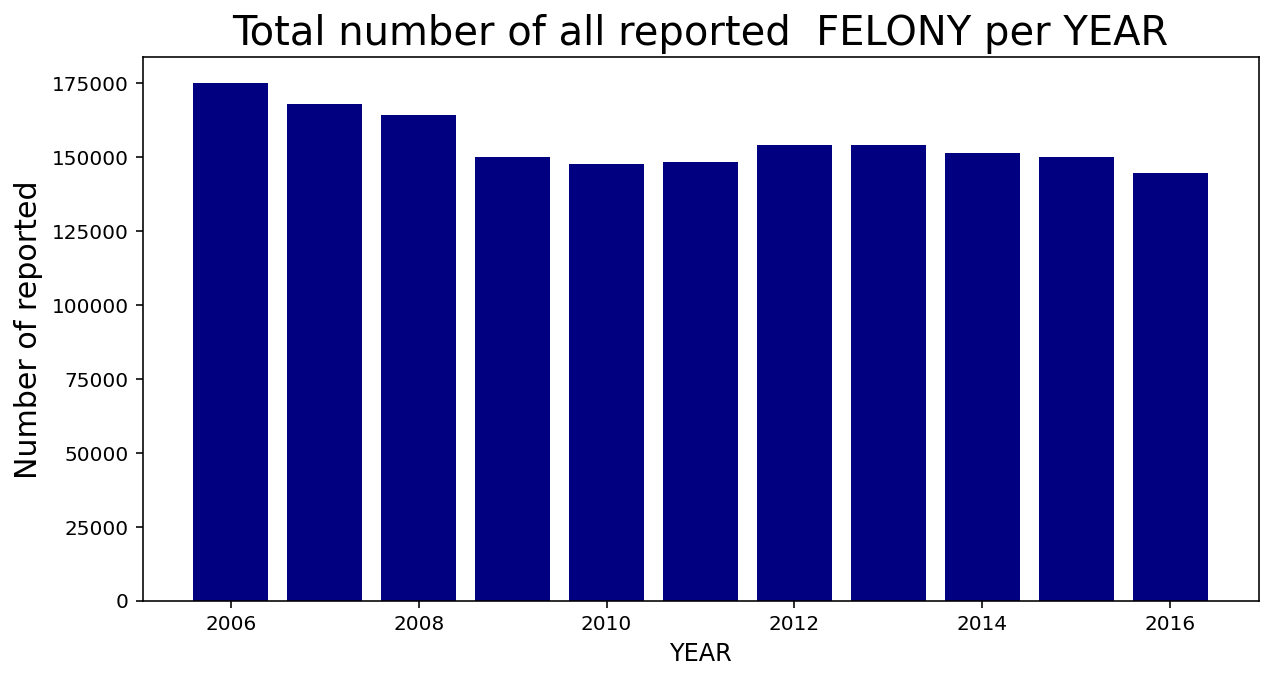

In [18]:
# Question 2d: Create a plot that shows the total number of reported felonies per year.
df_fel['YEAR'].value_counts()
df_fel['YEAR'].value_counts().sort_index()
values = df_fel['YEAR'].value_counts().sort_index().keys().tolist()
counts = df_fel['YEAR'].value_counts().sort_index().tolist()
value_dict = dict(zip(values, counts))
print(value_dict)
plt.figure(figsize=(10,5))
plt.title('Total number of all reported  FELONY per YEAR',fontsize=20)
plt.xlabel("YEAR",fontsize=12)
plt.ylabel("Number of reported",fontsize=15)
plt.bar(values,counts, color='navy')

## Question 3: Analysis of the "Big-7" felonies

The NYPD calls the following types of felonies as the "big-7" crimes, as they tend to affect most the quality of life:

* GRAND LARCENY 
* ROBBERY 
* FELONY ASSAULT 
* BURGLARY 
* GRAND LARCENY OF MOTOR VEHICLE 
* RAPE 
* MURDER & NON-NEGL. MANSLAUGHTER 


Focus on the big-7 felonies. Report the number of these crimes over time, from 2006 till 2016, **broken down by type of felony**. Focus on reporting the **total** number of crimes per category, on a **per month** and on **per year** basis. Generate the associated plot.

**Hint 1**: The type of felony is included in the `OFNS_DESC` column. You can use the `IN` command in SQL to limit your results to these offenses, or use an `OR` clause. Alternatively, you can use the [`.isin()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html) command in Pandas.

**Hint 2**: If you would like to move the legend outside the plot, you can use the following command: `df.plot(...).legend(bbox_to_anchor=(1, 0.75))`. The two values for the parameter `bbox_to_anchor` describe the x/y location of the legend, compared to the plot. Experiment with different values to understand the effect.


In [19]:
df_fel['OFNS_DESC'].value_counts()

GRAND LARCENY                      469031
ROBBERY                            214064
FELONY ASSAULT                     204708
BURGLARY                           204054
MISCELLANEOUS PENAL LAW            123346
GRAND LARCENY OF MOTOR VEHICLE     108150
CRIMINAL MISCHIEF & RELATED OF      82229
DANGEROUS DRUGS                     67368
THEFT-FRAUD                         58672
DANGEROUS WEAPONS                   55988
FORGERY                             55248
ARSON                               14690
RAPE                                14390
SEX CRIMES                          11125
POSSESSION OF STOLEN PROPERTY        9850
MURDER & NON-NEGL. MANSLAUGHTER      4770
NYS LAWS-UNCLASSIFIED FELONY         4437
KIDNAPPING & RELATED OFFENSES        2428
CHILD ABANDONMENT/NON SUPPORT         386
PROSTITUTION & RELATED OFFENSES       136
GAMBLING                              125
HOMICIDE-NEGLIGENT-VEHICLE             94
INTOXICATED/IMPAIRED DRIVING           49
ENDAN WELFARE INCOMP              

In [20]:
# 방법1
df_b7a = df_fel[(df_fel['OFNS_DESC']=='ROBBERY')|(df_fel['OFNS_DESC']=='RAPE')|(df_fel['OFNS_DESC']=='BURGLARY')]
print(df_b7a['OFNS_DESC'].value_counts())
print('==================================')
# 방법2
big_7 = df_fel['OFNS_DESC'].isin(['GRAND LARCENY','ROBBERY','FELONY ASSAULT','BURGLARY','GRAND LARCENY OF MOTOR VEHICLE','RAPE','MURDER & NON-NEGL. MANSLAUGHTER'])
df_b7b = df_fel[big_7]
print(df_b7b['OFNS_DESC'].value_counts())
print('==================================')
df_b7b.head(10)

ROBBERY     214064
BURGLARY    204054
RAPE         14390
Name: OFNS_DESC, dtype: int64
GRAND LARCENY                      469031
ROBBERY                            214064
FELONY ASSAULT                     204708
BURGLARY                           204054
GRAND LARCENY OF MOTOR VEHICLE     108150
RAPE                                14390
MURDER & NON-NEGL. MANSLAUGHTER      4770
Name: OFNS_DESC, dtype: int64


,CMPLNT_NUM,CMPLNT_FR,YEAR,MONTH,LAW_CAT_CD,OFNS_DESC,BORO_NM,Latitude,Longitude
0,100001206,2012-02-15 12:00:00,2012,2,FELONY,GRAND LARCENY OF MOTOR VEHICLE,QUEENS,40.680750,-73.777865
1,100001253,2014-08-17 08:00:00,2014,8,FELONY,GRAND LARCENY,MANHATTAN,40.865458,-73.920939
4,100005768,2007-01-31 02:00:00,2007,1,FELONY,GRAND LARCENY,MANHATTAN,40.759140,-73.990266
5,100005920,2012-07-26 15:00:00,2012,7,FELONY,BURGLARY,QUEENS,40.775695,-73.900578
7,100006313,2013-07-04 01:00:00,2013,7,FELONY,GRAND LARCENY,BROOKLYN,40.683911,-73.960939
8,100006320,2015-07-05 05:15:00,2015,7,FELONY,FELONY ASSAULT,BROOKLYN,40.670391,-73.906034
10,100006811,2009-04-24 11:00:00,2009,4,FELONY,BURGLARY,BROOKLYN,40.653483,-74.010590
11,100006895,2012-07-19 03:45:00,2012,7,FELONY,ROBBERY,BROOKLYN,40.683047,-73.964779
12,100007471,2015-11-11 23:00:00,2015,11,FELONY,GRAND LARCENY,QUEENS,40.785722,-73.801102
13,100007771,2009-01-13 20:00:00,2009,1,FELONY,GRAND LARCENY,QUEENS,40.699539,-73.911038


In [21]:
print( df_b7b['OFNS_DESC'][(df_b7b['MONTH']==1)].value_counts().sort_index())
a = df_b7b['OFNS_DESC'][(df_b7b['MONTH']==1)].value_counts().sort_index().tolist()
a

BURGLARY                           16890
FELONY ASSAULT                     15212
GRAND LARCENY                      36493
GRAND LARCENY OF MOTOR VEHICLE      8754
MURDER & NON-NEGL. MANSLAUGHTER      352
RAPE                                1345
ROBBERY                            18452
Name: OFNS_DESC, dtype: int64


[16890, 15212, 36493, 8754, 352, 1345, 18452]

In [22]:
def big7_month(df_b7b):
  a,b,c,d,e,f,g = [],[],[],[],[],[],[]
  for i in range(12):
    m = i+1
    l = df_b7b['OFNS_DESC'][(df_b7b['MONTH']==m)].value_counts().sort_index().tolist()
    a+=[l[0]]
    b+=[l[1]]
    c+=[l[2]]
    d+=[l[3]]
    e+=[l[4]]
    f+=[l[5]]
    g+=[l[6]]
  return {'BURGLARY':a,'FELONY ASSAULT':b,'GRAND LARCENY':c,' GRAND LARCENY OF MOTOR VEHICLE':d,'MURDER & NON-NEGL. MANSLAUGHTER':e,'RAPE':f,'ROBBERY':g}

r = big7_month(df_b7b)

In [23]:
r

{' GRAND LARCENY OF MOTOR VEHICLE': [8754,
  7033,
  7991,
  8299,
  9223,
  9060,
  9953,
  10381,
  10046,
  9837,
  8809,
  8764],
 'BURGLARY': [16890,
  14013,
  15011,
  14797,
  16828,
  16718,
  18276,
  18965,
  17850,
  18894,
  17585,
  18227],
 'FELONY ASSAULT': [15212,
  13136,
  16114,
  16372,
  19008,
  19196,
  20124,
  19341,
  17783,
  17219,
  15829,
  15374],
 'GRAND LARCENY': [36493,
  31231,
  35993,
  36039,
  39355,
  40168,
  41757,
  42502,
  41128,
  42688,
  40037,
  41640],
 'MURDER & NON-NEGL. MANSLAUGHTER': [352,
  282,
  343,
  359,
  419,
  437,
  500,
  465,
  429,
  428,
  353,
  403],
 'RAPE': [1345,
  979,
  1129,
  1116,
  1183,
  1324,
  1370,
  1338,
  1201,
  1245,
  1111,
  1049],
 'ROBBERY': [18452,
  13745,
  15584,
  15290,
  17680,
  17464,
  18909,
  19236,
  19180,
  20556,
  18717,
  19251]}

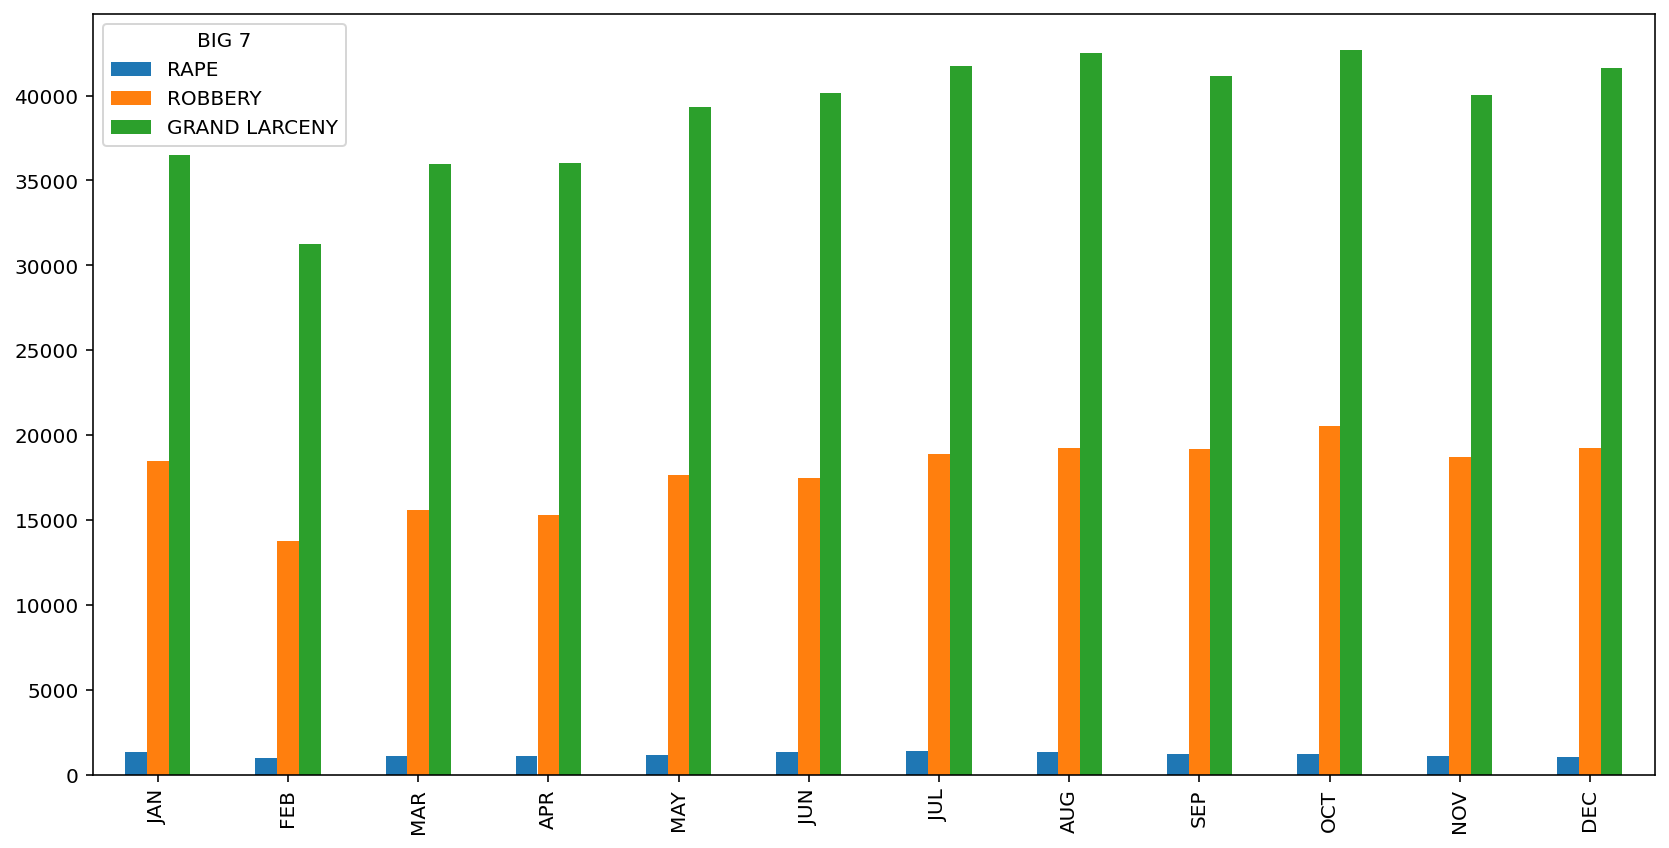

In [24]:
import numpy as np
X = ['JAN','FEB','MAR','APR','MAY','JUN',"JUL","AUG","SEP",'OCT','NOV','DEC']
A = r['RAPE']
B = r['ROBBERY']
C = r['GRAND LARCENY']

df_plot = pd.DataFrame(np.c_[A,B,C], index=X,columns=pd.Index(['RAPE', 'ROBBERY', 'GRAND LARCENY'],name='BIG 7'))
df_plot.plot(kind='bar',figsize=(14,7))

## Question 4: Analyze the Big-7 felonies based on hour of the day.

You are now asked to break down the different big-7 felonies hour of day.

* **Question 4a**: Show the number of big-7 felonies, broken down by hour of day. (e.g., _6049 reported robberies at 5am_). Generate a bar plot with the results. Generate a bar plot with the results.

* **Question 4b**: Show the number of big-7 felonies, broken down by hour of day. To allow for easier comparison among felonies, **normalize** the data by dividing by the total incidents for each type of felony.  (e.g., _2.8% of the reported robberies happen at 5am_). Generate a bar plot with the results.


**Hint 1**: If you have a datetime column in your dataframe (say `df.CMPLNT_FR`), you can extract the day of the week and the hour, using the following commands. These commands will create two new columns, `DAY_OF_WEEK` and `HOUR`. The `DAY_OF_WEEK` is encoded as a *ordered* categorical variable, in order to sort properly. The `HOUR` is a numeric variable. 

```python
  categs = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  df['DAY_OF_WEEK'] = pd.Categorical(df.complaint_datetime.dt.day_name(), categories = categs, ordered=True)
  df['HOUR'] = df.complaint_datetime.dt.hour
```

Alternatively, you can use the commands `HOUR()` and `DAYOFWEEK()` in SQL, to extract these values.

**Hint 2**: When creating plots, you may prefer to put the plot for each columns of the dataframe in a separate plot. The option `subplots=True` for the `df.plot()` command provides that capability. (See [the related documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html#subplots).) If you use the `subplots=True`, you can also use the `layout=(num_rows, num_columns)` option to specify the number of rows (`num_rows`) and the number of columns (`num_columns`) to use for the grid arrangement.

**Hint 3**: The normalizing data and when generating plots, you may find the `.T` command very handy (shorthand for `.transpose()`). The `.T` command returns the transpose of the dataframe, i.e., returns a dataframe where the columns become rows and vice versa.

In [25]:
categs = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_b7b['DAY_OF_WEEK'] = pd.Categorical(df_b7b.CMPLNT_FR.dt.day_name(), categories = categs, ordered=True)
df_b7b['HOUR'] = df_b7b.CMPLNT_FR.dt.hour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
df_b7b['OFNS_DESC'][df_b7b['HOUR']==0].value_counts().sort_index()

BURGLARY                            6070
FELONY ASSAULT                     11233
GRAND LARCENY                      25860
GRAND LARCENY OF MOTOR VEHICLE      4747
MURDER & NON-NEGL. MANSLAUGHTER      304
RAPE                                1884
ROBBERY                            10898
Name: OFNS_DESC, dtype: int64

In [27]:
df_b7b['OFNS_DESC'][df_b7b['HOUR']==12].value_counts().sort_index()

BURGLARY                           11906
FELONY ASSAULT                      7028
GRAND LARCENY                      39205
GRAND LARCENY OF MOTOR VEHICLE      3822
MURDER & NON-NEGL. MANSLAUGHTER      149
RAPE                                 811
ROBBERY                             6620
Name: OFNS_DESC, dtype: int64

In [28]:
df_b7b['OFNS_DESC'].value_counts()

GRAND LARCENY                      469031
ROBBERY                            214064
FELONY ASSAULT                     204708
BURGLARY                           204054
GRAND LARCENY OF MOTOR VEHICLE     108150
RAPE                                14390
MURDER & NON-NEGL. MANSLAUGHTER      4770
Name: OFNS_DESC, dtype: int64

In [29]:
print('{}% of the reported robberies happen at 5am'.format(round((6049/214064)*100,1)))

2.8% of the reported robberies happen at 5am


In [30]:
df_b7b.head()

,CMPLNT_NUM,CMPLNT_FR,YEAR,MONTH,LAW_CAT_CD,OFNS_DESC,BORO_NM,Latitude,Longitude,DAY_OF_WEEK,HOUR
0,100001206,2012-02-15 12:00:00,2012,2,FELONY,GRAND LARCENY OF MOTOR VEHICLE,QUEENS,40.680750,-73.777865,Wednesday,12
1,100001253,2014-08-17 08:00:00,2014,8,FELONY,GRAND LARCENY,MANHATTAN,40.865458,-73.920939,Sunday,8
4,100005768,2007-01-31 02:00:00,2007,1,FELONY,GRAND LARCENY,MANHATTAN,40.759140,-73.990266,Wednesday,2
5,100005920,2012-07-26 15:00:00,2012,7,FELONY,BURGLARY,QUEENS,40.775695,-73.900578,Thursday,15
7,100006313,2013-07-04 01:00:00,2013,7,FELONY,GRAND LARCENY,BROOKLYN,40.683911,-73.960939,Thursday,1


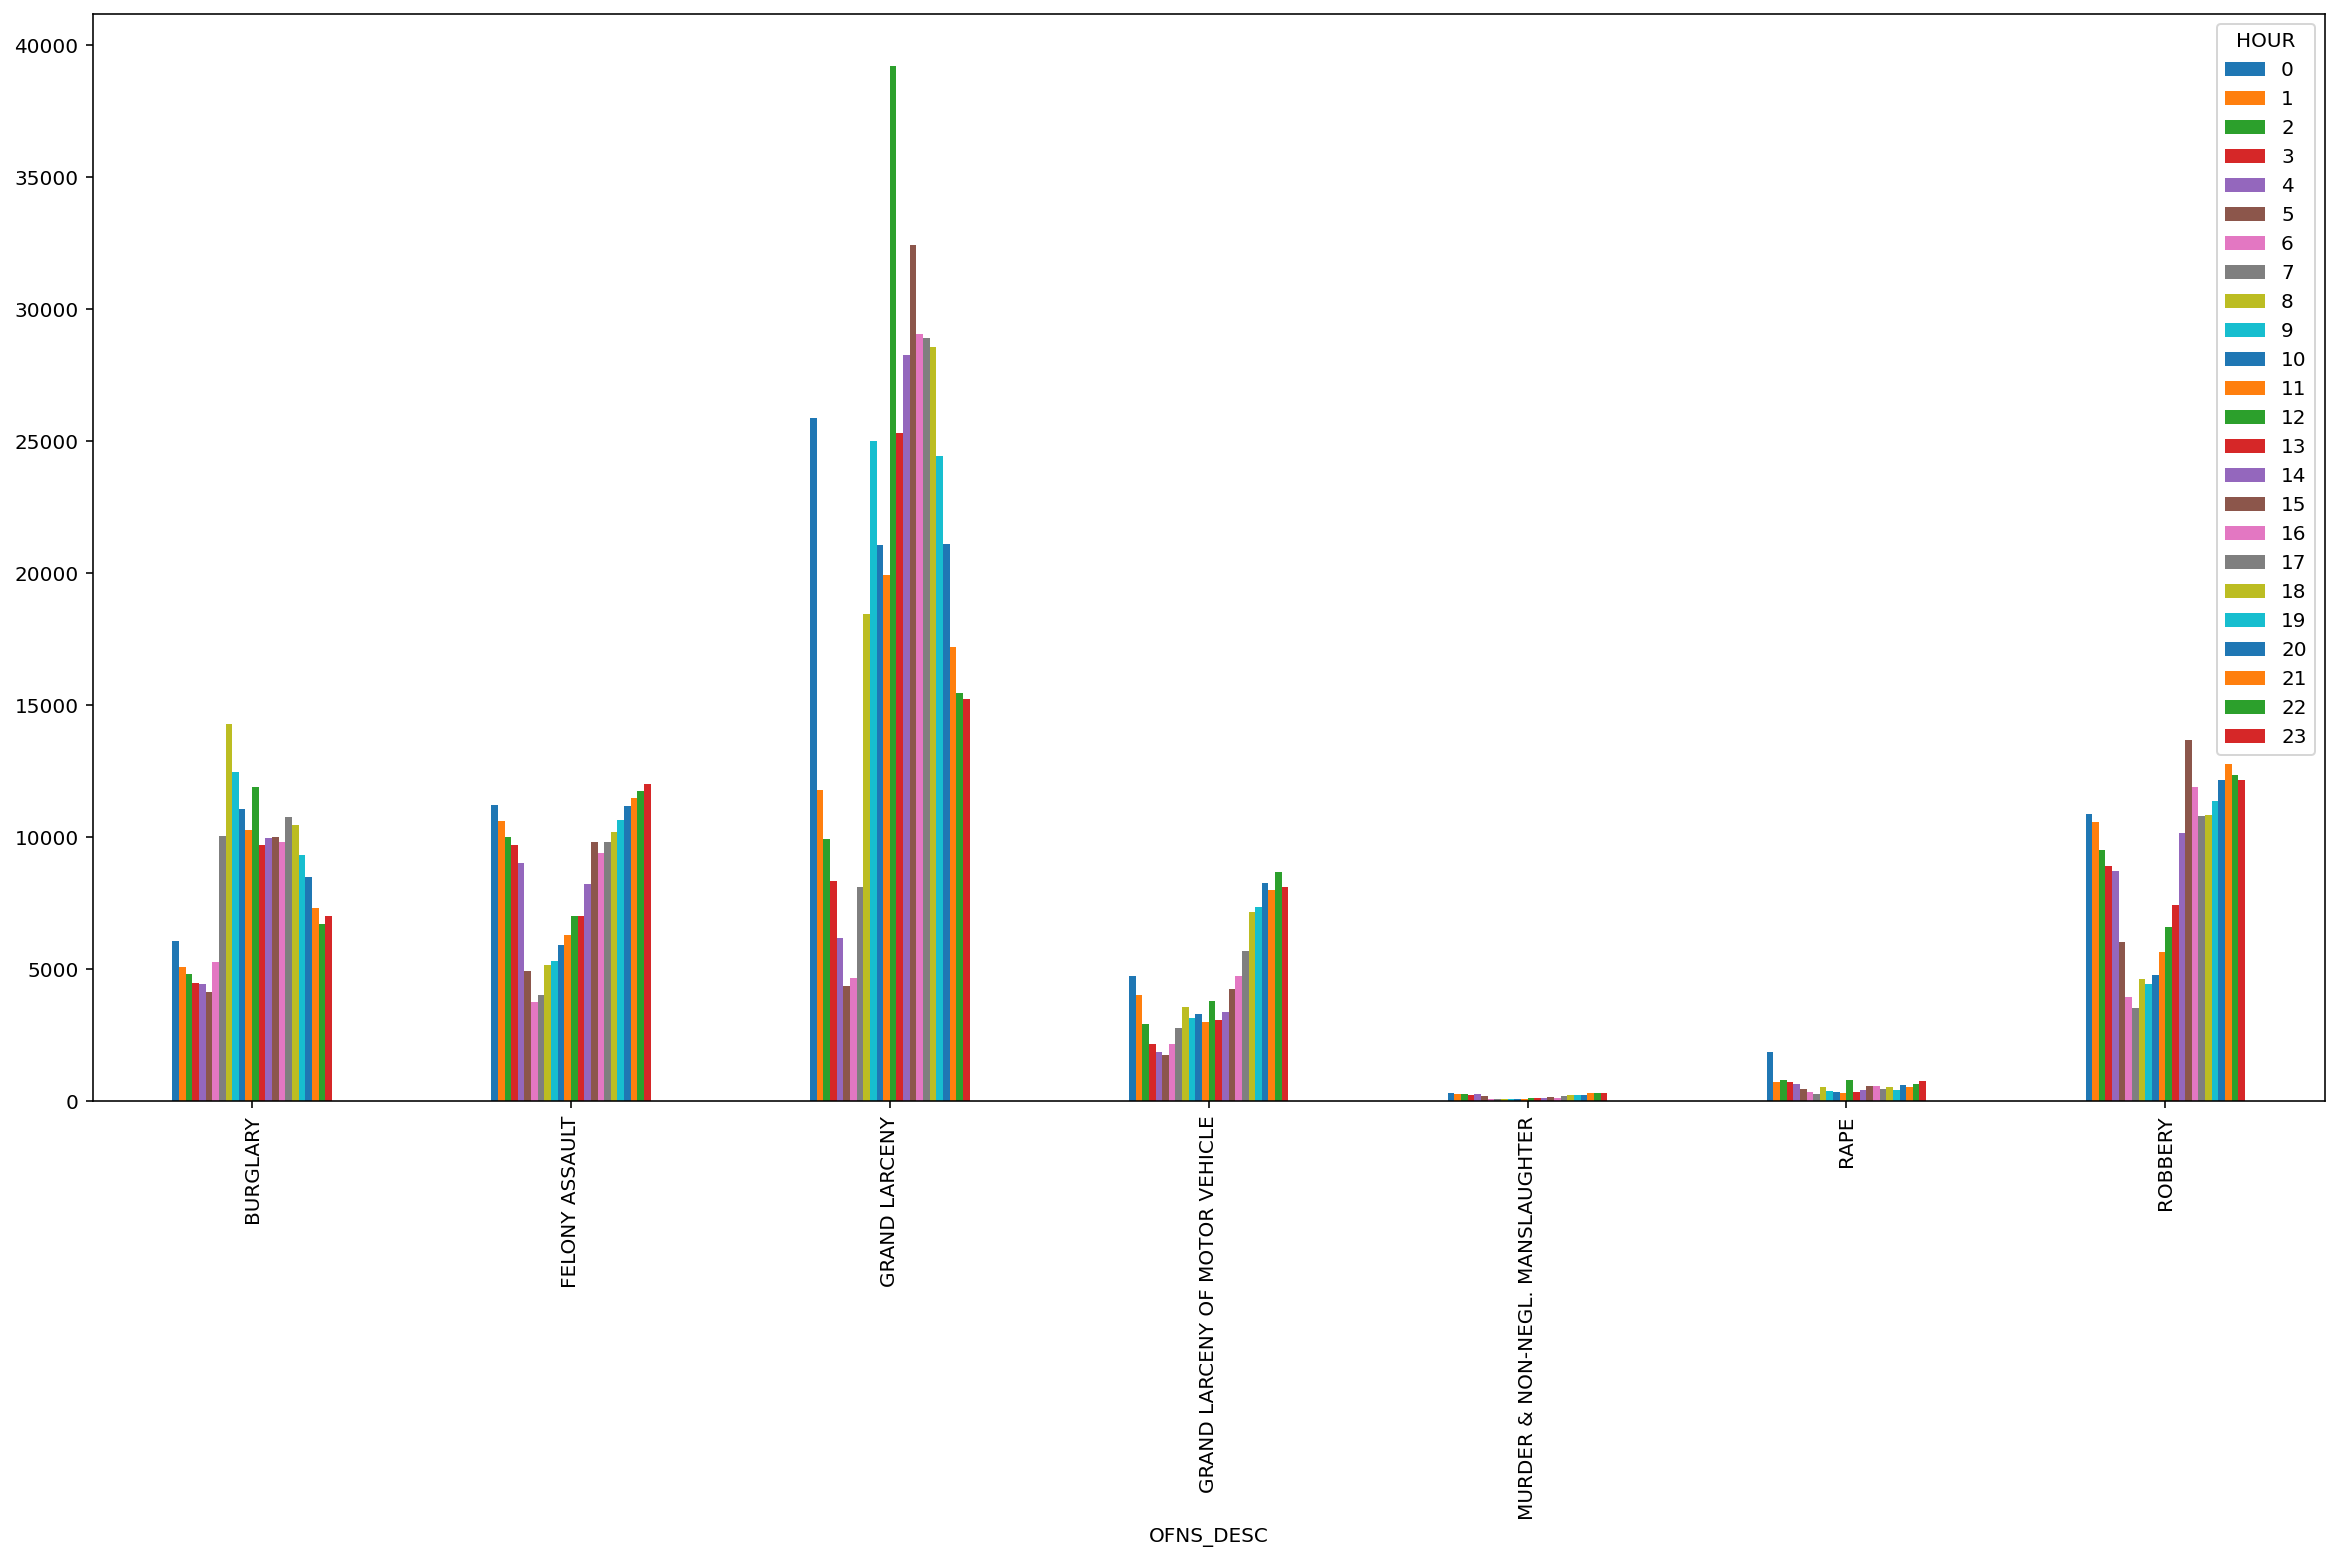

In [31]:
grouped = df_b7b['OFNS_DESC'].groupby([df_b7b['HOUR']])
grouped.value_counts().unstack(0).plot.bar(figsize=(20,10))

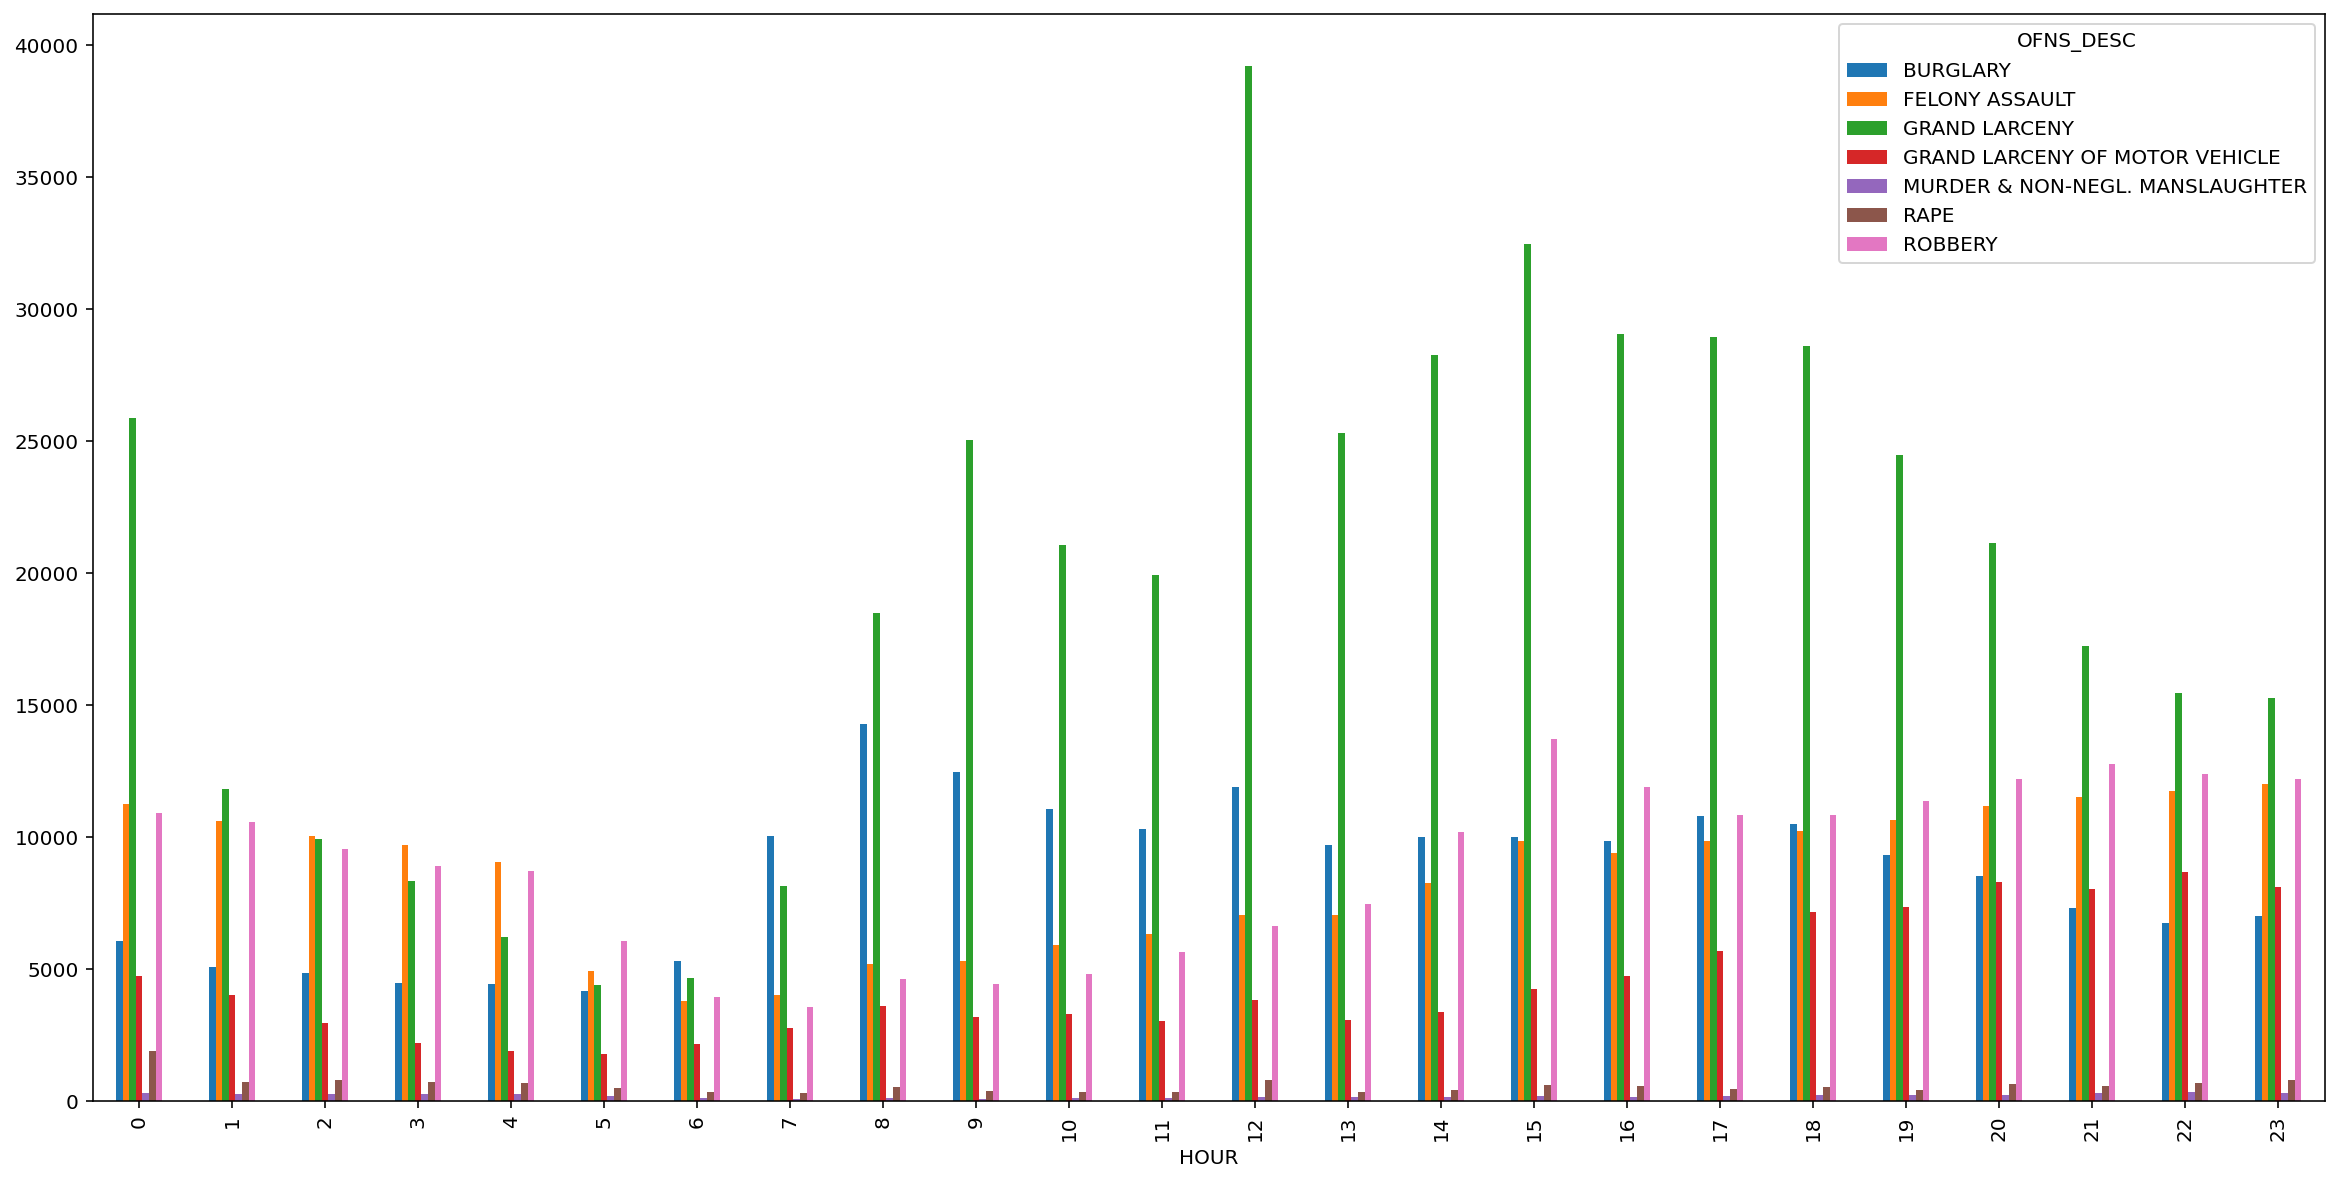

In [32]:
# Question 4a: Show the number of big-7 felonies, broken down by hour of day. (e.g., 6049 reported robberies at 5am). Generate a bar plot with the results. Generate a bar plot with the results.
grouped = df_b7b['HOUR'].groupby([df_b7b['OFNS_DESC']])
grouped.value_counts().unstack(0).plot.bar(figsize=(20,10))

In [33]:
#Question 4b: Show the number of big-7 felonies, broken down by hour of day. 
# To allow for easier comparison among felonies, normalize the data by dividing by the total incidents for each type of felony.
# (e.g., 2.8% of the reported robberies happen at 5am). Generate a bar plot with the results.
grouped = df_b7b['HOUR'].groupby([df_b7b['OFNS_DESC']])
#grouped.value_counts(normalize=True).unstack(0).plot.bar(figsize=(20,10))
df_b7b["avg"] = 0
# GRAND LARCENY                      469031
#ROBBERY                            214064
#FELONY ASSAULT                     204708
#BURGLARY                           204054
#GRAND LARCENY OF MOTOR VEHICLE     108150
#RAPE                                14390
#MURDER & NON-NEGL. MANSLAUGHTER      4770
# df_b7b['avg'][df_b7b['OFNS_DESC']=='GRAND LARCENY'] = 469031
# df_b7b['avg'][df_b7b['OFNS_DESC']=='ROBBERY'] = 214064
# df_b7b['avg'][df_b7b['OFNS_DESC']=='FELONY ASSAULT'] = 204708
# df_b7b['avg'][df_b7b['OFNS_DESC']=='BURGLARY'] = 204054
# df_b7b['avg'][df_b7b['OFNS_DESC']=='GRAND LARCENY OF MOTOR VEHICLE'] = 108150
# df_b7b['avg'][df_b7b['OFNS_DESC']=='RAPE'] = 14390
# df_b7b['avg'][df_b7b['OFNS_DESC']=='MURDER & NON-NEGL. MANSLAUGHTER'] = 4770
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
grouped.value_counts(normalize=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


OFNS_DESC                        HOUR
BURGLARY                         8       0.070021
                                 9       0.061057
                                 12      0.058347
                                 10      0.054182
                                 17      0.052810
                                 18      0.051374
                                 11      0.050394
                                 7       0.049252
                                 15      0.049031
                                 14      0.048923
                                 16      0.048218
                                 13      0.047576
                                 19      0.045708
                                 20      0.041719
                                 21      0.035829
                                 23      0.034383
                                 22      0.032957
                                 0       0.029747
                                 6       0.025890
            

## Question 5: Spatial Analysis

You are asked to analyze the spatial density for the following types of felonies:
* GRAND LARCENY
* GRAND LARCENY OF MOTOR VEHICLE
* FELONY ASSAULT
* MURDER & NON-NEGL. MANSLAUGHTER

Use the `Latitude` and `Longitude` variables from the dataset to identify the location of each crime. (FYI, for victim privacy, the reported rapes do not have geocoding variables associated with them.) Limit your analysis to Manhattan only (see the `BORO_NM` attribute), felonies, and to dates between 2006 and 2016 (inclusive on both ends).

**Hint 1**: Remember that if you do a 2d density estimation, you can speed up the computation by taking just a sample of the data that you analyze using the `dataframe.sample()` command.

**Hint 2**: If you could like to plot a map of Manhttan under your density plot, you can use the shapefile of NYC neighborhoods from NYC Open Data, and keep only Manhattan neighborhoods. See the code below. 

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
22,MN21,7526913.95137,061,Gramercy,12096.8911742,Manhattan,1,"MULTIPOLYGON (((-73.97854 40.73689, -73.97857 ..."
40,MN15,18362149.2813,061,Clinton,34481.6287726,Manhattan,1,"MULTIPOLYGON (((-73.99383 40.77293, -73.99379 ..."
45,MN40,20065364.316,061,Upper East Side-Carnegie Hill,23778.4103624,Manhattan,1,"MULTIPOLYGON (((-73.94933 40.78519, -73.94982 ..."
60,MN25,19014298.8134,061,Battery Park City-Lower Manhattan,43738.4960413,Manhattan,1,"MULTIPOLYGON (((-74.00078 40.69429, -74.00096 ..."
61,MN14,15805586.3139,061,Lincoln Square,19869.9083138,Manhattan,1,"MULTIPOLYGON (((-73.97500 40.77753, -73.97546 ..."


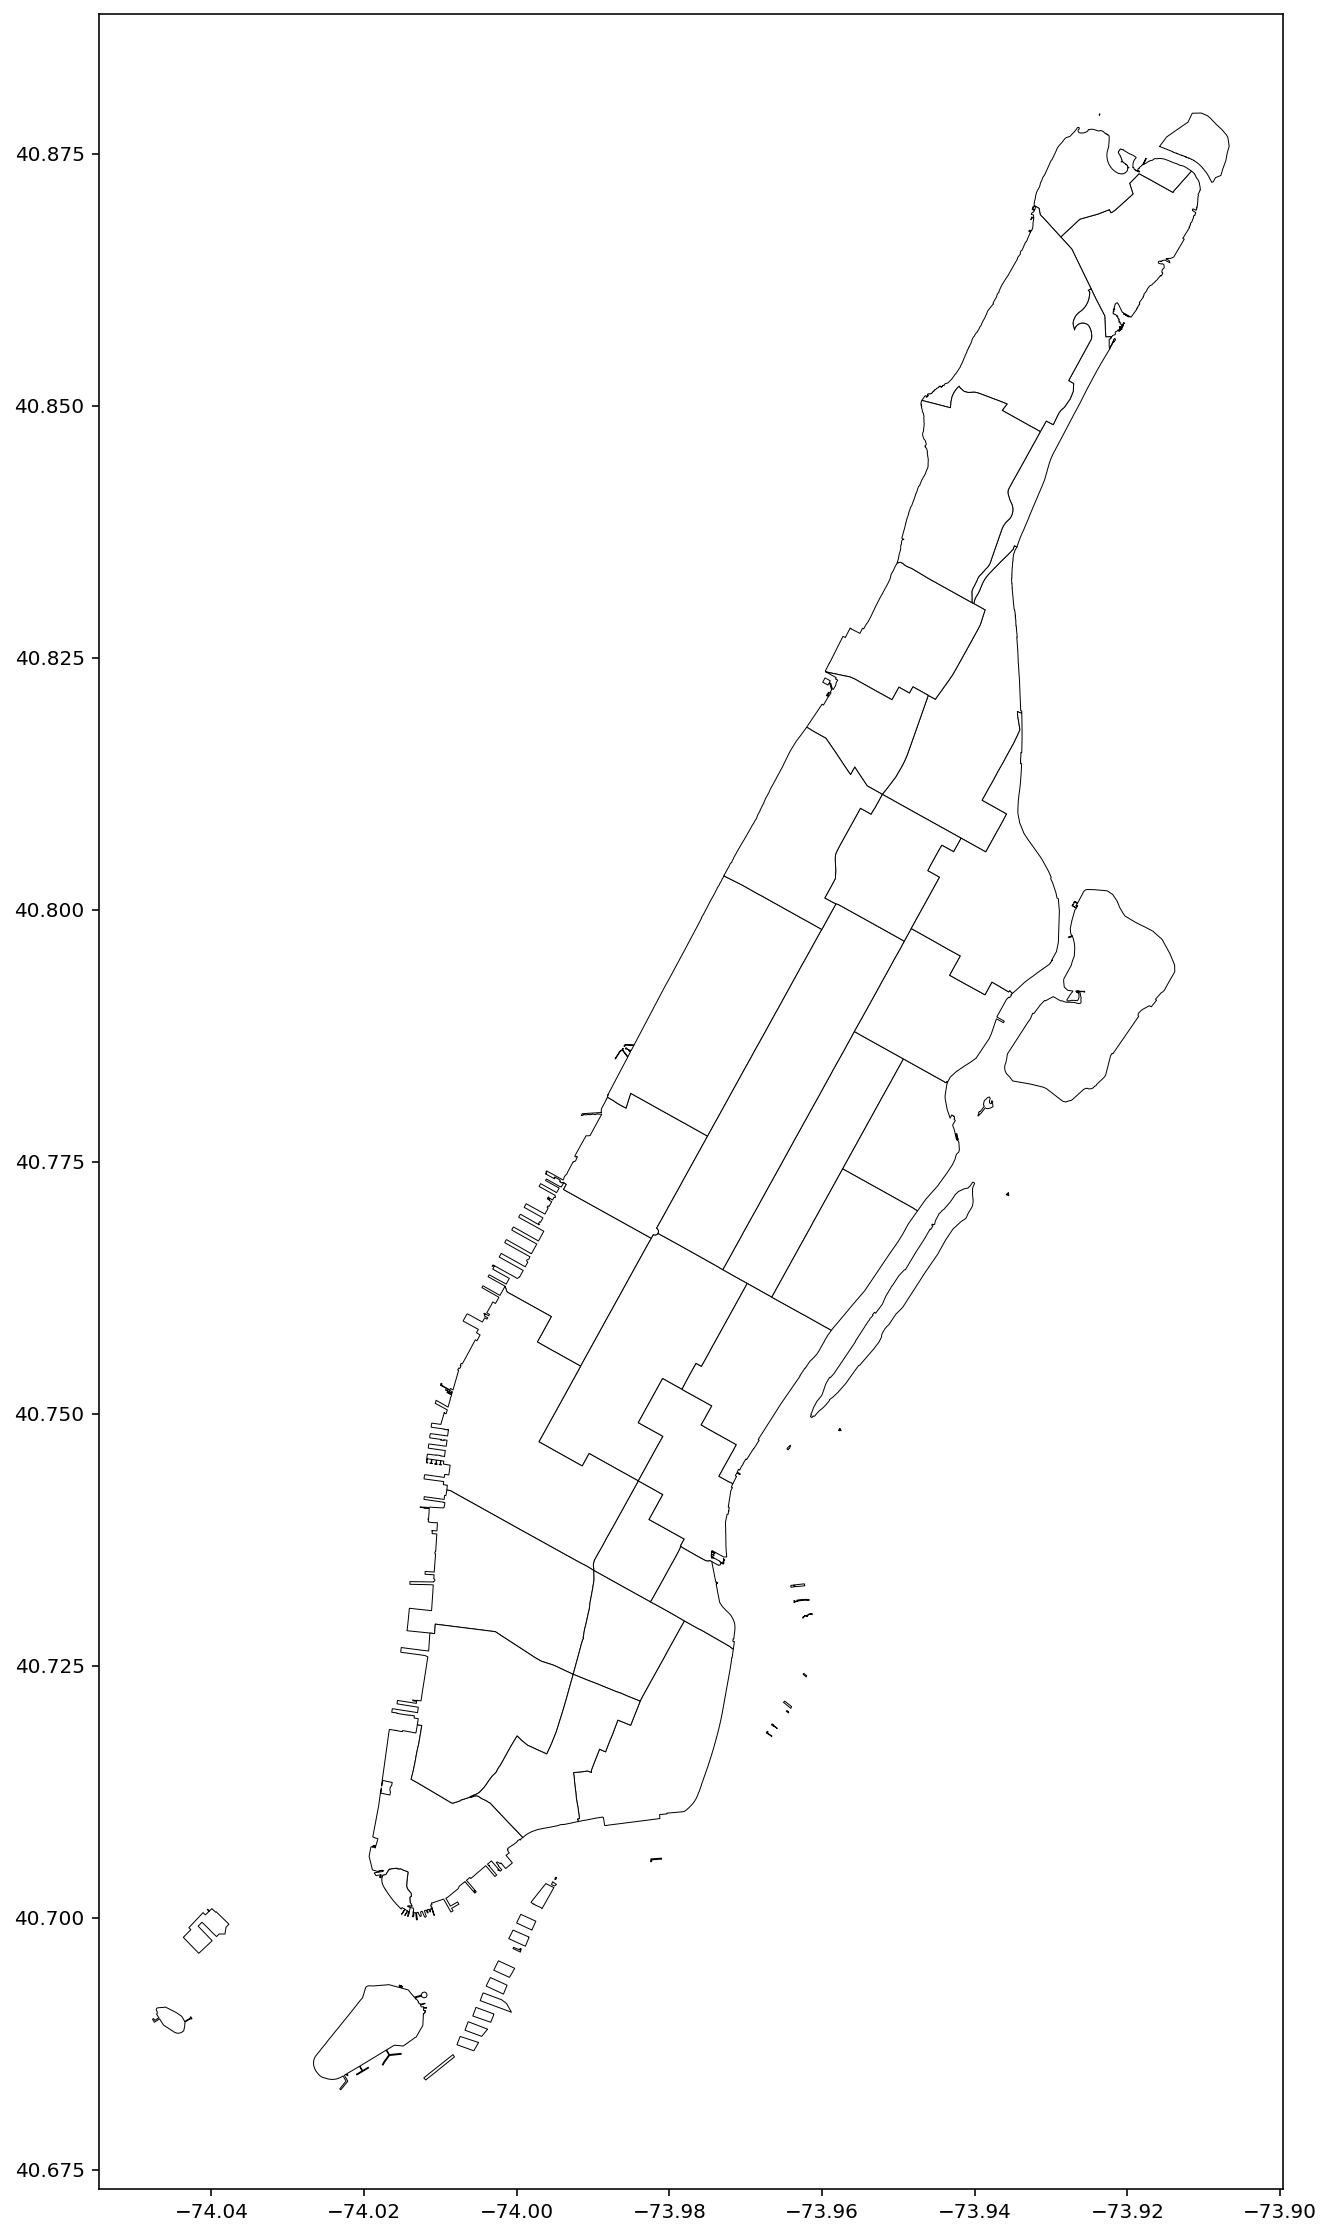

In [37]:
# Dataset from NYC Open Data: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
shapefile = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
# Load the shapefile
df_nyc = gpd.GeoDataFrame.from_file(shapefile)
# Limit the data to only Manhattan neighborhoods 
df_manhattan = df_nyc.query( "boro_name =='Manhattan' ")
# Create a plot
manhattan_plot = df_manhattan.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(30, 20))


df_manhattan.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


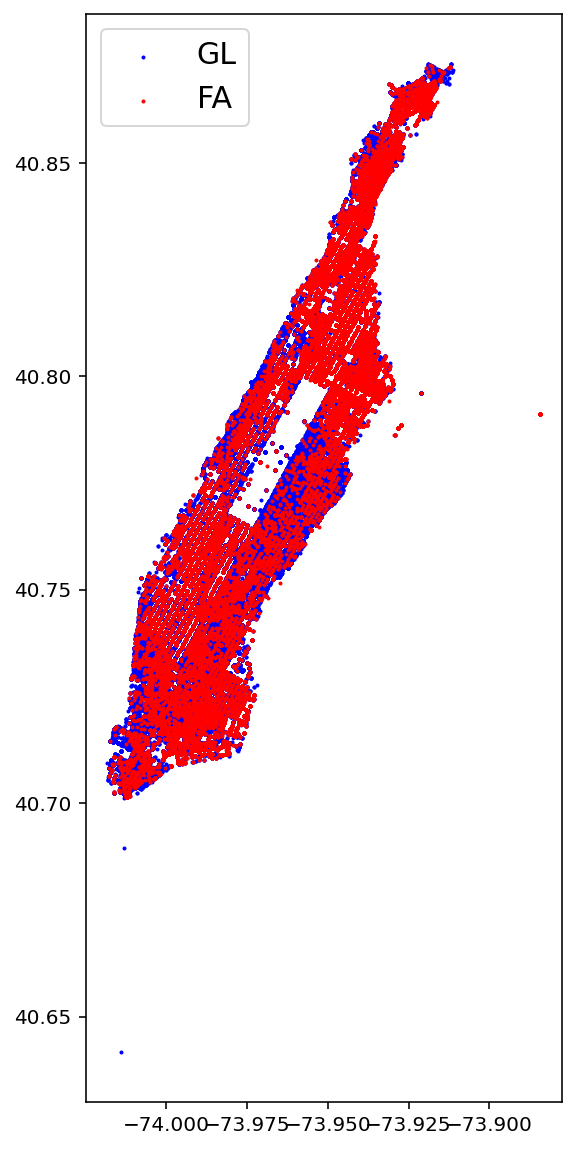

In [38]:
df1 = df[df['BORO_NM']=='MANHATTAN']
df1 = df1[(df1['OFNS_DESC']=='GRAND LARCENY')|(df1['OFNS_DESC']=='GRAND LARCENY OF MOTOR VEHICLE')|(df1['OFNS_DESC']=='FELONY ASSAULT')|(df1['OFNS_DESC']=='MURDER & NON-NEGL. MANSLAUGHTER')]
#df1['BORO_NM'].value_counts()
#df1['OFNS_DESC'].value_counts()
#df1['CMPLNT_FR'].describe()
df1.head()

from shapely.geometry import Polygon, Point
geometry = [Point(xy) for xy in zip(df1["Longitude"],df1["Latitude"])]
df1['geometry'] = geometry
#df1.head()
geo_df = gpd.GeoDataFrame(df1,)
geo_df.head()

fig,ax = plt.subplots(figsize = (15,10))
manhattan_plot.plot(ax= ax)
geo_df[geo_df['OFNS_DESC']=='GRAND LARCENY'].plot(ax = ax, markersize = 1, color = 'blue', marker = 'o', label='GL')
geo_df[geo_df['OFNS_DESC']=='FELONY ASSAULT'].plot(ax = ax, markersize = 1, color = 'red', marker = 'o', label='FA')
plt.legend(prop={'size':15})
plt.show()

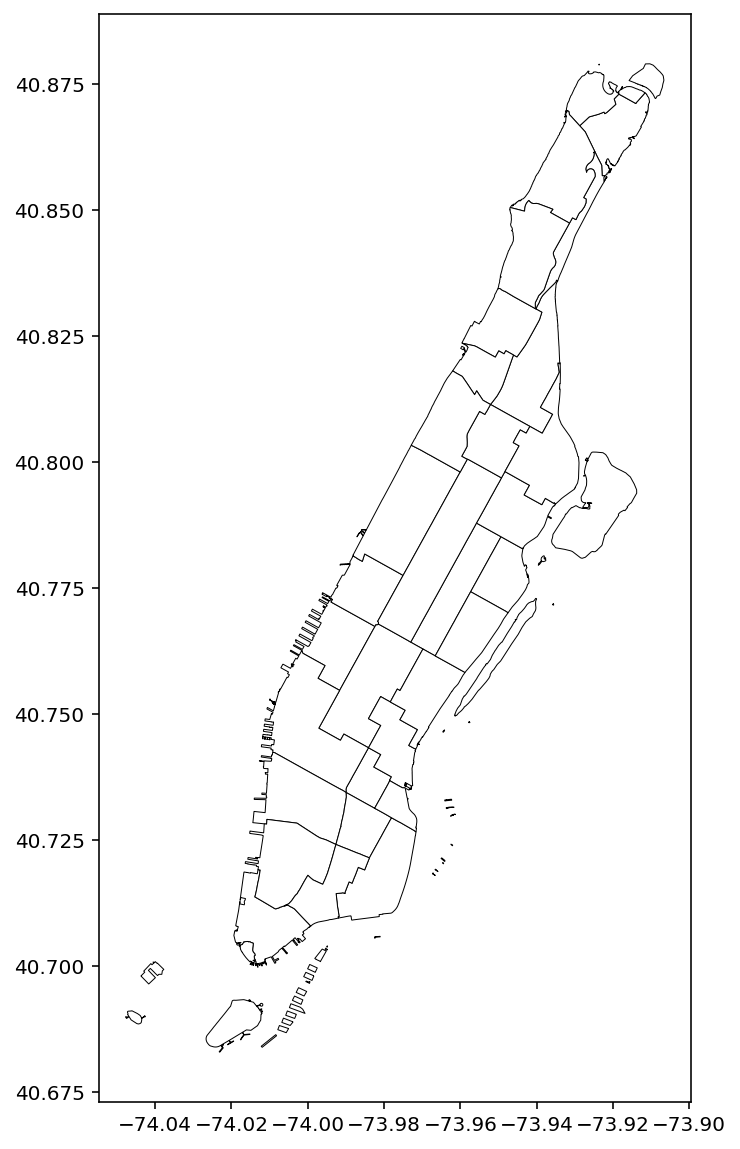

In [36]:
# If you want to plot on top of the Manhattan, 
# you need to recreate the Manhattan plot in each cell
manhattan_plot = df_manhattan.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))
